# <u>Pokémon with stats</u>



###  - Antonio Augusto 
###  - Davi Padula
###  - Fernando Puebla 


### Importando Biliotecas


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Importando Dataset


In [133]:
df = pd.read_csv('Pokemon.csv', delimiter=',')


# 1 - Quais são os 5 Pokémons com os maiores valores de "Attack"?




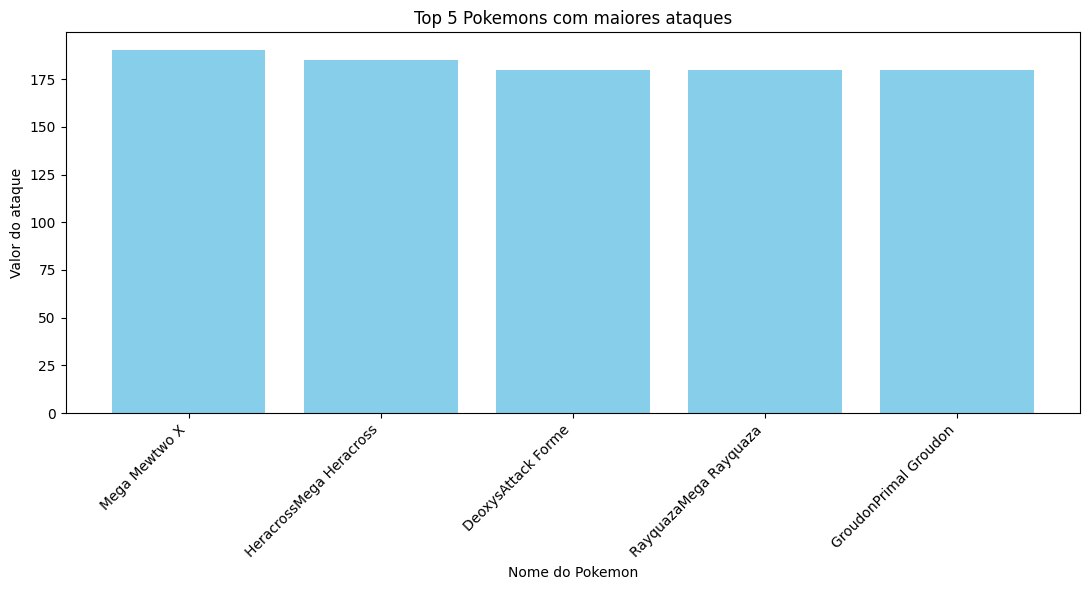

In [134]:
top_5_attack = df.sort_values(by='Attack', ascending=False).head(5)

plt.figure(figsize=(11, 6))
plt.bar(top_5_attack['Name'], top_5_attack['Attack'], color='skyblue')
plt.ylabel('Valor do ataque')
plt.xlabel('Nome do Pokemon')

plt.title('Top 5 Pokemons com maiores ataques')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2 - Existe diferença significativa entre o total de atributos (Total) de Pokémon lendários e não lendários?


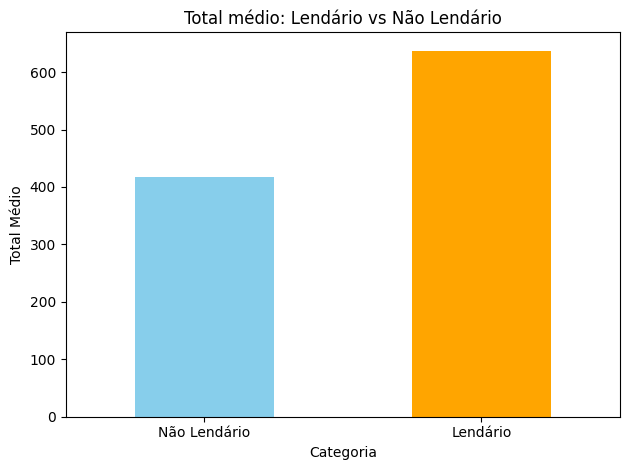

In [135]:
lendariosTotal = df.groupby("Legendary")["Total"].mean()
lendariosTotal.plot(kind='bar', title='Total médio: Lendário vs Não Lendário', ylabel='Total Médio', xlabel='Categoria', rot=0, color=['skyblue', 'orange'])
plt.xticks(ticks=[0, 1], labels=['Não Lendário', 'Lendário'])
plt.tight_layout()
plt.show()

# 3 - Quantos Pokemons do tipo "Fire" tem em comparação ao tipo "Dragon"

Número de Pokémon do tipo Fire: 52
Número de Pokémon do tipo Dragon: 32


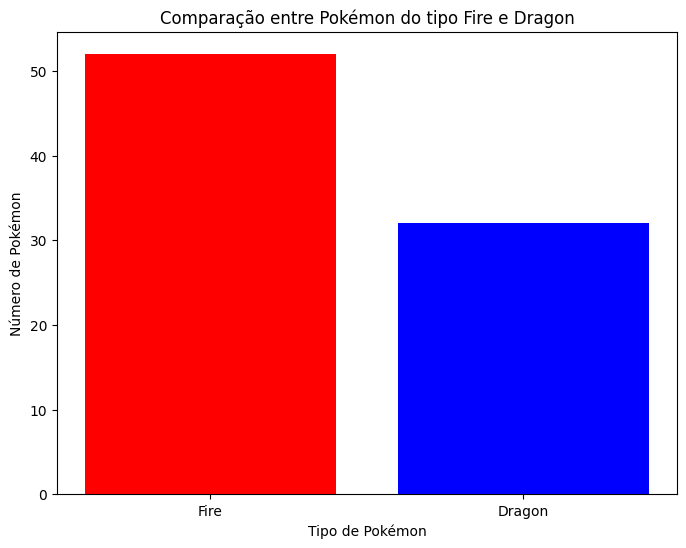

In [136]:
fire_pokemon_count = df[df['Type 1'] == 'Fire'].shape[0]
dragon_pokemon_count = df[df['Type 1'] == 'Dragon'].shape[0]

print(f'Número de Pokémon do tipo Fire: {fire_pokemon_count}')
print(f'Número de Pokémon do tipo Dragon: {dragon_pokemon_count}')

tipos = ['Fire', 'Dragon']
contagens = [fire_pokemon_count, dragon_pokemon_count]

plt.figure(figsize=(8, 6))
plt.bar(tipos, contagens, color=['red', 'blue'])
plt.xlabel('Tipo de Pokémon')
plt.ylabel('Número de Pokémon')
plt.title('Comparação entre Pokémon do tipo Fire e Dragon')
plt.show()

### 4 - Qual a média de velocidade (Speed) por geração (Generation) e como ela evolui ao longo das gerações?

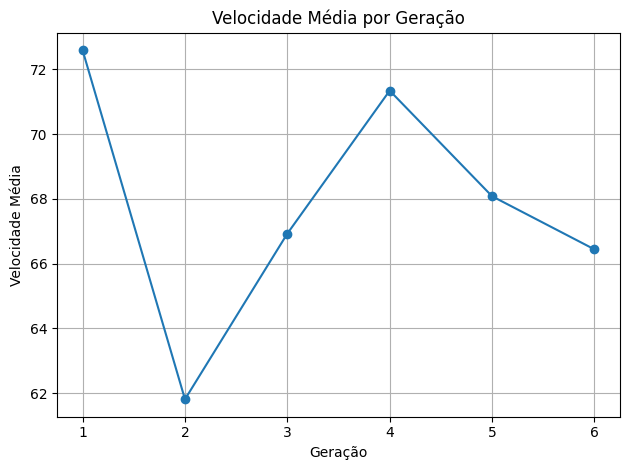

In [137]:
speed_by_generation = df.groupby("Generation")["Speed"].mean()
plt.plot(speed_by_generation.index, speed_by_generation.values, marker='o')
plt.title("Velocidade Média por Geração")
plt.xlabel("Geração")
plt.ylabel("Velocidade Média")
plt.grid(True)
plt.tight_layout()
plt.show()


### 5 - Quais combinações de Tipo 1 e Tipo 2 são mais frequentes?


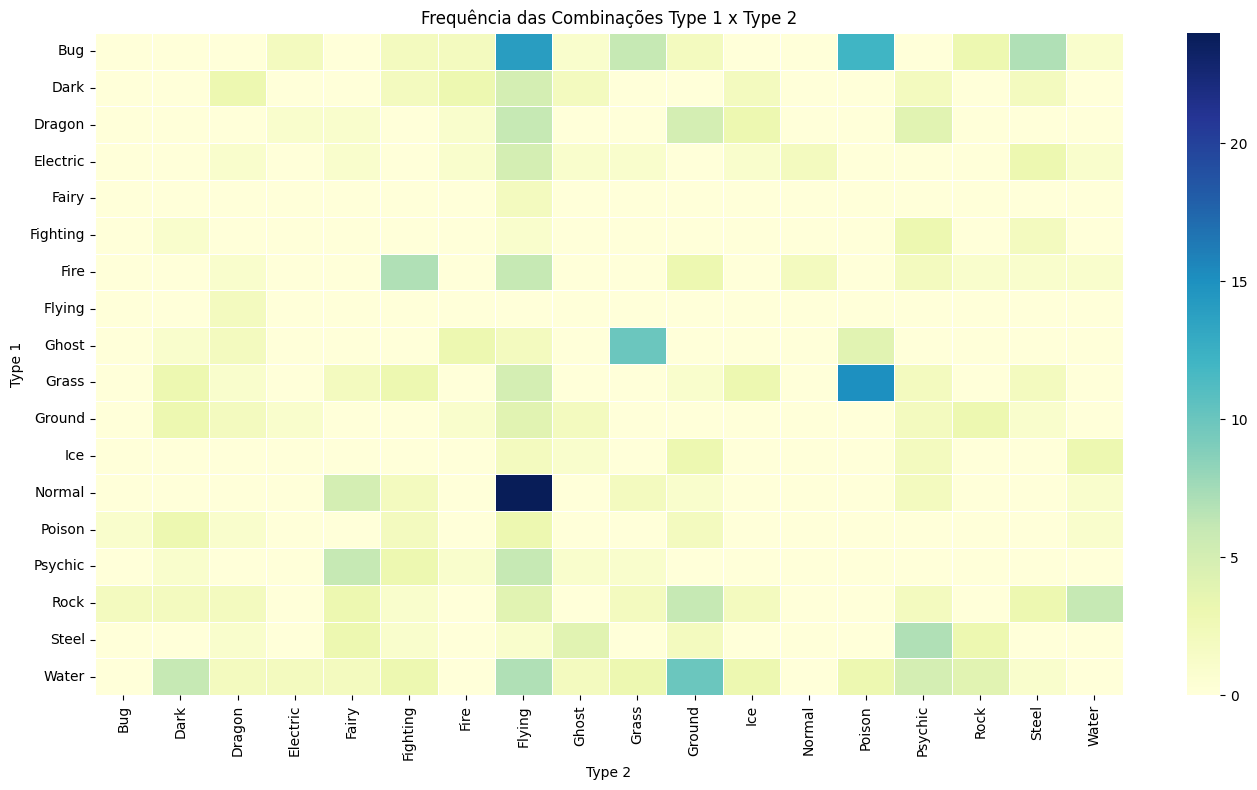

In [138]:
ContagemTipo = df.groupby(['Type 1', 'Type 2']).size().unstack(fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(ContagemTipo, cmap="YlGnBu", linewidths=0.5)
plt.title("Frequência das Combinações Type 1 x Type 2")
plt.tight_layout()
plt.show()

### 6 - Quais os atributos médios dos Pokémon do tipo "Fairy" comparados aos do tipo "Electric"?


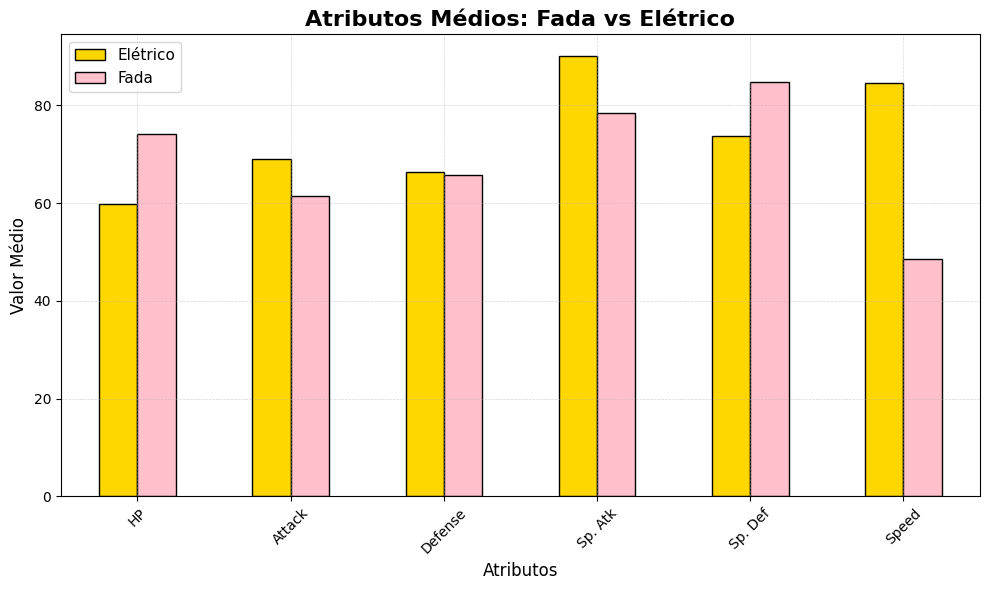

In [139]:
stats = df[df["Type 1"].isin(["Electric", "Fairy"])]
mean_stats = stats.groupby("Type 1")[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]].mean()

fig, ax = plt.subplots(figsize=(10, 6))
mean_stats.T.plot(kind='bar', ax=ax, color=['gold', 'pink'], edgecolor='black')

ax.set_title('Atributos Médios: Fada vs Elétrico', fontsize=16, weight='bold')
ax.set_ylabel("Valor Médio", fontsize=12)
ax.set_xlabel("Atributos", fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

ax.legend(["Elétrico", "Fada"], loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()


### 7 - Quais são os tipos principais (Type 1) mais comuns e quantos Pokémon existem de cada um?


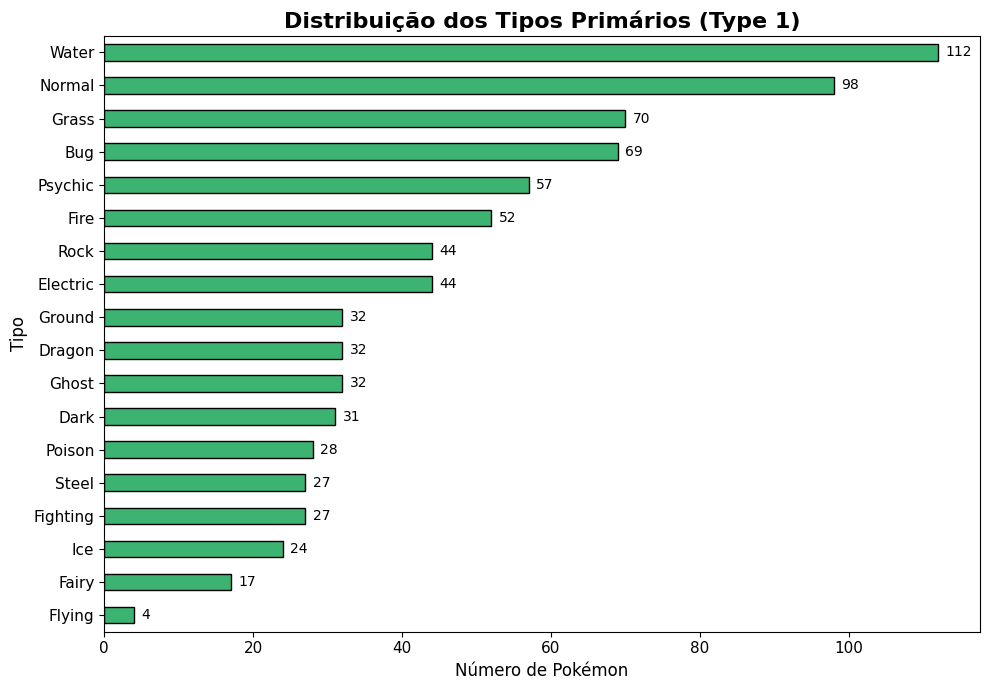

In [140]:
type1_counts = df["Type 1"].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(10, 7))
type1_counts.plot(kind='barh', ax=ax, color='mediumseagreen', edgecolor='black')

ax.set_title("Distribuição dos Tipos Primários (Type 1)", fontsize=16, weight='bold')
ax.set_xlabel("Número de Pokémon", fontsize=12)
ax.set_ylabel("Tipo", fontsize=12)

ax.tick_params(axis='y', labelsize=11)
ax.tick_params(axis='x', labelsize=11)
ax.grid(True, axis='x', linestyle='--', linewidth=0.5, alpha=0.0)

for i, v in enumerate(type1_counts):
    ax.text(v + 1, i, str(v), color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()


### 8 - Correlação entre atributos de batalha



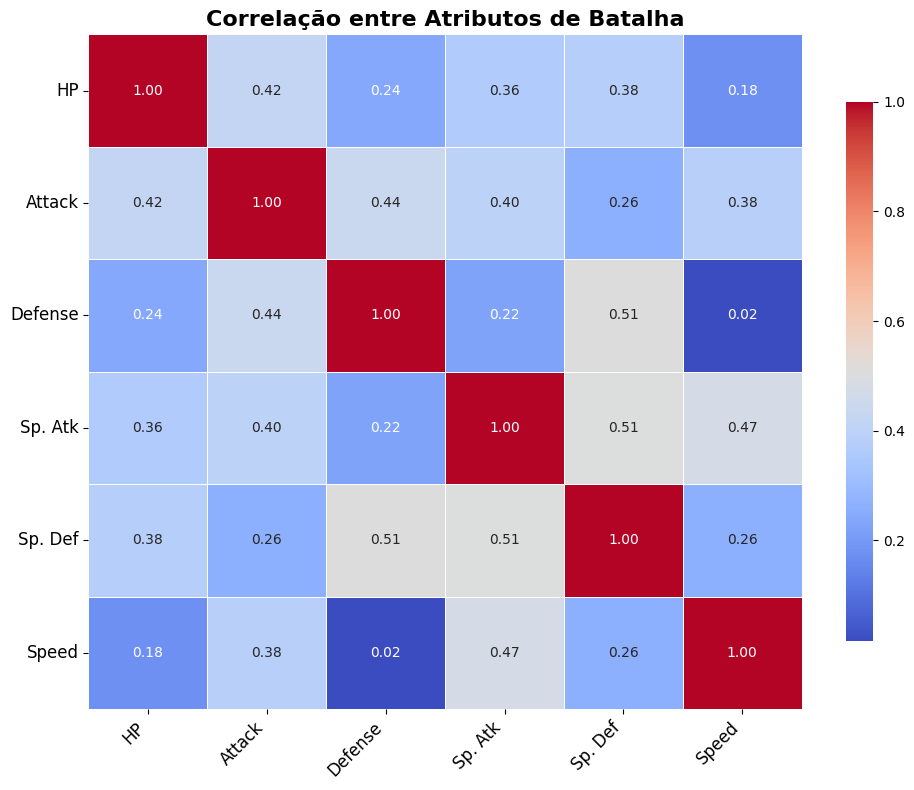

In [145]:
battle_stats = df[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]
correlation_matrix = battle_stats.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlação entre Atributos de Batalha", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

### 9 - Há relação entre a defesa especial (Sp. Def) e a geração? Alguma geração se destaca?


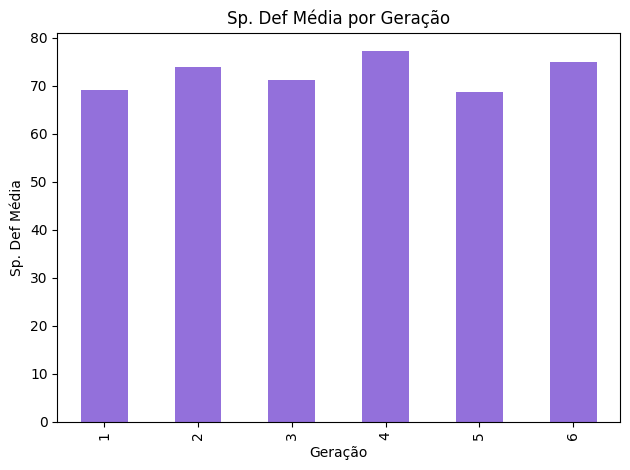

In [142]:
sp_def_by_gen = df.groupby("Generation")["Sp. Def"].mean()
sp_def_by_gen.plot(kind='bar', color='mediumpurple', title='Sp. Def Média por Geração')
plt.xlabel("Geração")
plt.ylabel("Sp. Def Média")
plt.tight_layout()
plt.show() 


### 10 - Qual a distribuição do total de pontos (Total) em Pokémon lendários e não lendários?



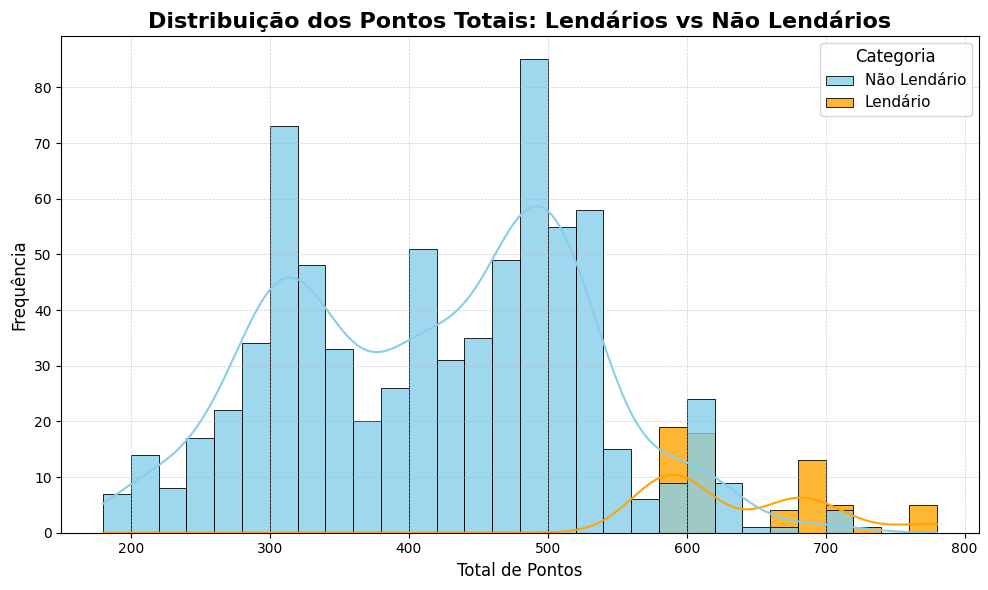

In [147]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=df,
    x="Total",
    hue="Legendary",
    bins=30,
    kde=True,
    palette={True: "orange", False: "skyblue"},
    edgecolor="black",
    linewidth=0.6,
    alpha=0.8
)

plt.title("Distribuição dos Pontos Totais: Lendários vs Não Lendários", fontsize=16, weight='bold')
plt.xlabel("Total de Pontos", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

legenda = ax.get_legend()
if legenda:
    texts = legenda.get_texts()
    for t in texts:
        if t.get_text() == "True":
            t.set_text("Lendário")
        elif t.get_text() == "False":
            t.set_text("Não Lendário")
    legenda.set_title("Categoria")
    legenda.get_title().set_fontsize(12)
    for label in texts:
        label.set_fontsize(11)

plt.tight_layout()
plt.show()
